In [9]:
import numpy as np
import pandas as pd

In [10]:
dataset=pd.read_csv("SMSSpam.csv",sep='\t',names=['labels','message'])

In [11]:
print(dataset)

     labels                                            message
0       ham  Go until jurong point, crazy.. Available only ...
1       ham                      Ok lar... Joking wif u oni...
2      spam  Free entry in 2 a wkly comp to win FA Cup fina...
3       ham  U dun say so early hor... U c already then say...
4       ham  Nah I don't think he goes to usf, he lives aro...
...     ...                                                ...
5567   spam  This is the 2nd time we have tried 2 contact u...
5568    ham               Will ü b going to esplanade fr home?
5569    ham  Pity, * was in mood for that. So...any other s...
5570    ham  The guy did some bitching but I acted like i'd...
5571    ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   labels   5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [13]:
dataset.describe()

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [14]:
dataset['labels']=dataset['labels'].map({'ham':0,'spam':1})
print(dataset)

      labels                                            message
0          0  Go until jurong point, crazy.. Available only ...
1          0                      Ok lar... Joking wif u oni...
2          1  Free entry in 2 a wkly comp to win FA Cup fina...
3          0  U dun say so early hor... U c already then say...
4          0  Nah I don't think he goes to usf, he lives aro...
...      ...                                                ...
5567       1  This is the 2nd time we have tried 2 contact u...
5568       0               Will ü b going to esplanade fr home?
5569       0  Pity, * was in mood for that. So...any other s...
5570       0  The guy did some bitching but I acted like i'd...
5571       0                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [15]:
import matplotlib.pyplot as plt
import seaborn as sms
%matplotlib inline

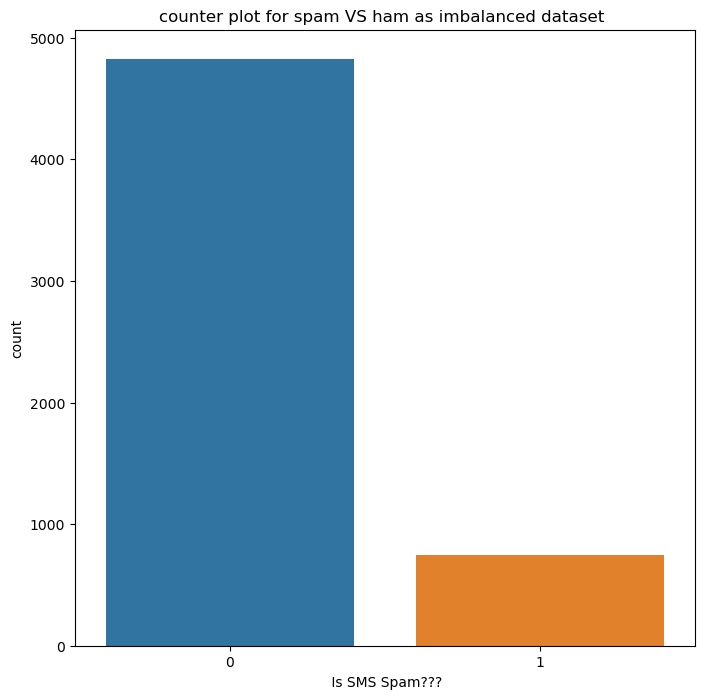

In [16]:
#counter plot for spam VS ham as imbalanced dataset
plt.figure(figsize=(8,8))
g=sms.countplot(x="labels",data=dataset)
p=plt.title("counter plot for spam VS ham as imbalanced dataset ")
p=plt.xlabel(" Is SMS Spam???")
p=plt.ylabel("count")


In [17]:
only_spam=dataset[dataset['labels']==1]
print(only_spam)

      labels                                            message
2          1  Free entry in 2 a wkly comp to win FA Cup fina...
5          1  FreeMsg Hey there darling it's been 3 week's n...
8          1  WINNER!! As a valued network customer you have...
9          1  Had your mobile 11 months or more? U R entitle...
11         1  SIX chances to win CASH! From 100 to 20,000 po...
...      ...                                                ...
5537       1  Want explicit SEX in 30 secs? Ring 02073162414...
5540       1  ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547       1  Had your contract mobile 11 Mnths? Latest Moto...
5566       1  REMINDER FROM O2: To get 2.50 pounds free call...
5567       1  This is the 2nd time we have tried 2 contact u...

[747 rows x 2 columns]


In [18]:
print("No:of spam:",len(only_spam))
print("No:of HAM:",len(dataset)-len(only_spam))
count=int((dataset.shape[0]-only_spam.shape[0])/only_spam.shape[0])
print(count)

No:of spam: 747
No:of HAM: 4825
6


In [19]:
for i in range(0,count-1):
    dataset=pd.concat([dataset,only_spam])
dataset.shape

(9307, 2)

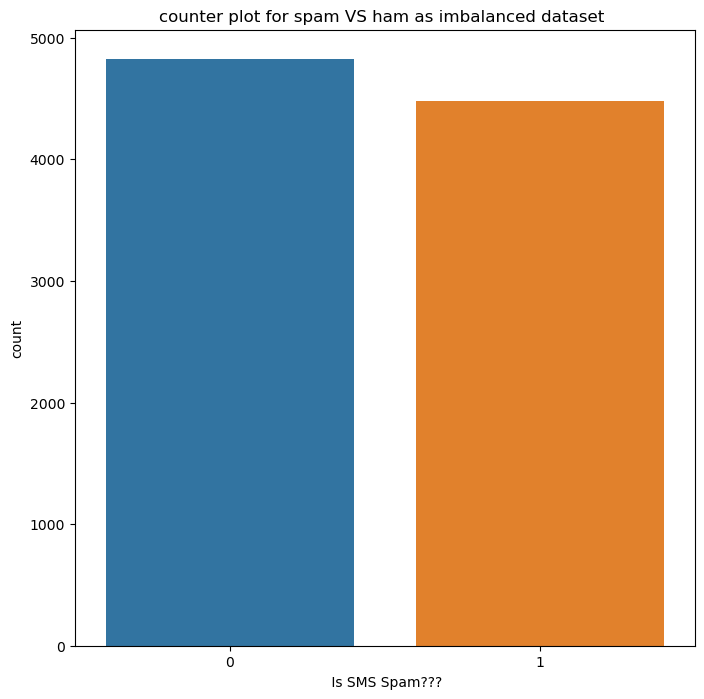

In [20]:
#counter plot for spam VS ham as imbalanced dataset
plt.figure(figsize=(8,8))
g=sms.countplot(x="labels",data=dataset)
p=plt.title("counter plot for spam VS ham as imbalanced dataset ")
p=plt.xlabel(" Is SMS Spam???")
p=plt.ylabel("count")


In [21]:
 # Creating new feature word count
dataset['word_count']=dataset['message'].apply(lambda x:len(x.split()))
print(dataset)

      labels                                            message  word_count
0          0  Go until jurong point, crazy.. Available only ...          20
1          0                      Ok lar... Joking wif u oni...           6
2          1  Free entry in 2 a wkly comp to win FA Cup fina...          28
3          0  U dun say so early hor... U c already then say...          11
4          0  Nah I don't think he goes to usf, he lives aro...          13
...      ...                                                ...         ...
5537       1  Want explicit SEX in 30 secs? Ring 02073162414...          16
5540       1  ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...          33
5547       1  Had your contract mobile 11 Mnths? Latest Moto...          28
5566       1  REMINDER FROM O2: To get 2.50 pounds free call...          28
5567       1  This is the 2nd time we have tried 2 contact u...          30

[9307 rows x 3 columns]


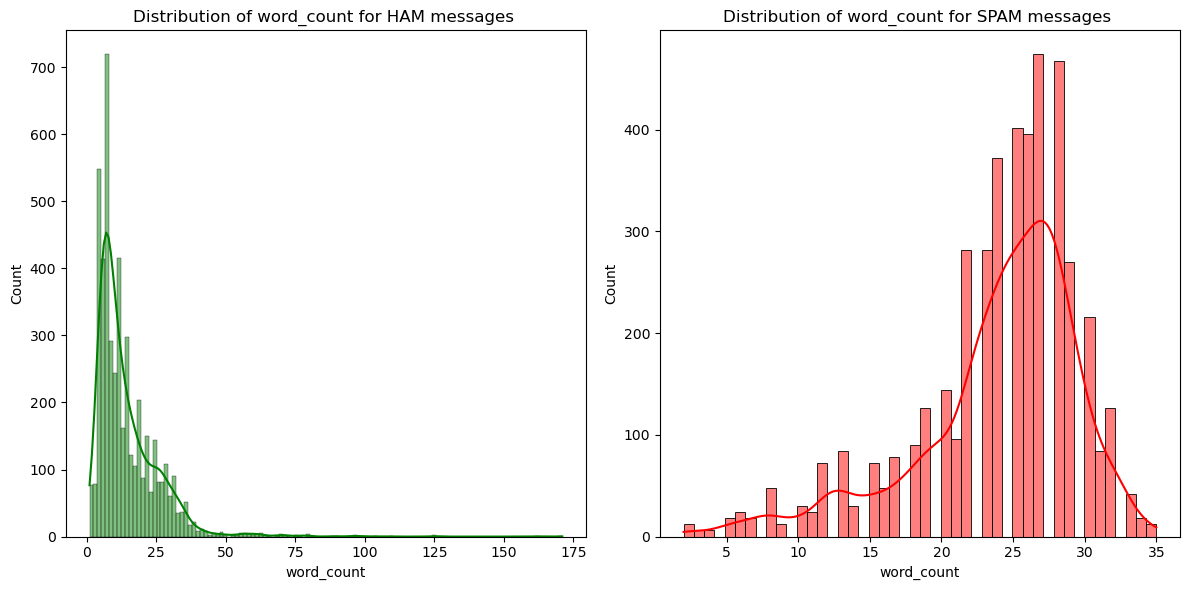

In [22]:
plt.figure(figsize=(12,6))

#(1,1)
plt.subplot(1,2,1)
g=sms.histplot(dataset[dataset['labels']==0].word_count,color="green",kde=True)
p=plt.title("Distribution of word_count for HAM messages ")

#(1,2)
plt.subplot(1,2,2)
g=sms.histplot(dataset[dataset['labels']==1].word_count,color="red",kde=True)
p=plt.title("Distribution of word_count for SPAM messages ")
plt.tight_layout()
plt.show()

In [23]:
#creating new feature of containing CURRENCY SYMBOLS
def currency(data):
    currency_symbols=['$','€','£','₹']
    for i in currency_symbols:
        if i in data :
            return 1
    return 0
    
dataset["contains_currency_symbols"]=dataset["message"].apply(currency)
 

In [24]:
dataset

,labels,message,word_count,contains_currency_symbols
0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,0,Ok lar... Joking wif u oni...,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,0,U dun say so early hor... U c already then say...,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0
...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0


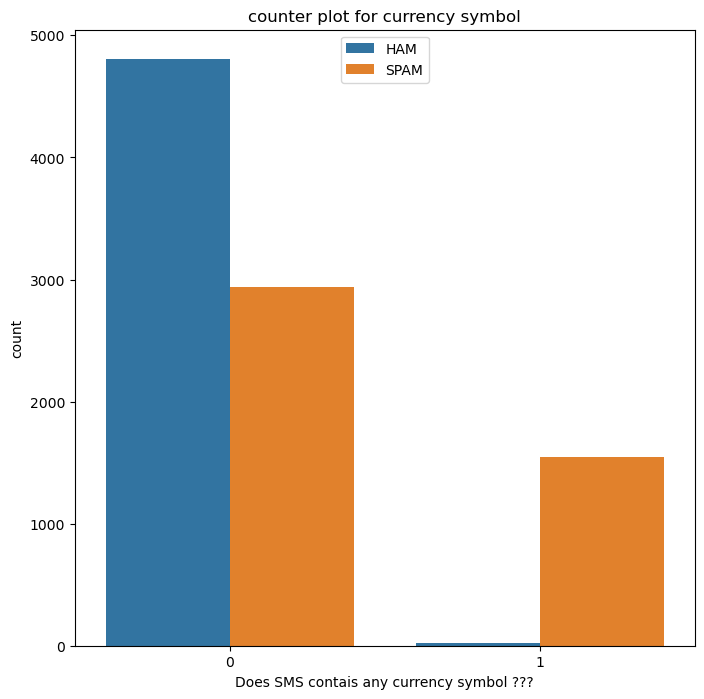

In [25]:
#counter plot for contains_currency_symbols
plt.figure(figsize=(8,8))
g=sms.countplot(x="contains_currency_symbols",data=dataset,hue="labels")
p=plt.title("counter plot for currency symbol")
p=plt.xlabel("Does SMS contais any currency symbol ???")
p=plt.ylabel("count")
p=plt.legend(labels=["HAM","SPAM"],loc=9)

In [26]:
#creating NEW feature contains NUMBEr
def number(data):
    for i in data:
        if ord(i)>=28 and ord(i)<=57:
            return 1
        return 0
dataset["contains_number"]=dataset["message"].apply(number)

In [27]:
#print dataset
dataset

,labels,message,word_count,contains_currency_symbols,contains_number
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,0
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1,0
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0,0


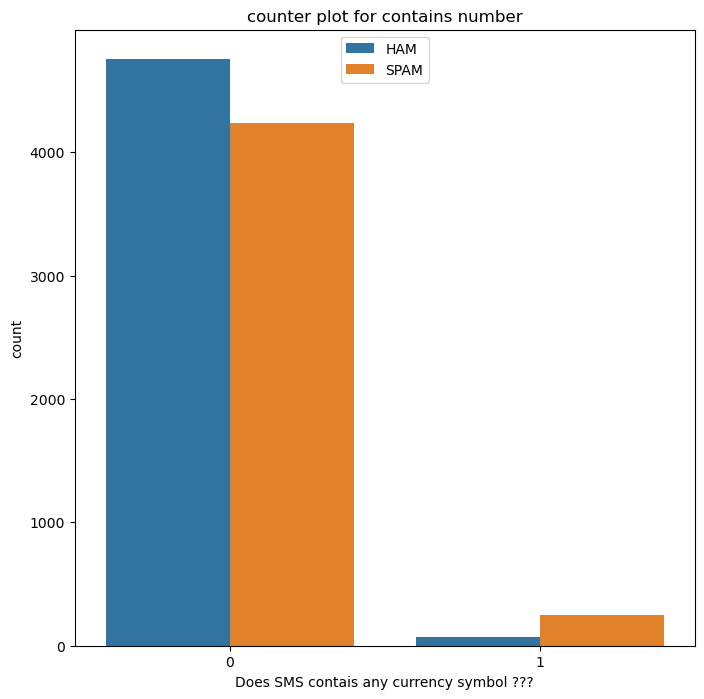

In [29]:
#counterplot for containing numbers
plt.figure(figsize=(8,8))
g=sms.countplot(x="contains_number",data=dataset,hue="labels")
p=plt.title("counter plot for contains number")
p=plt.xlabel("Does SMS contais any currency symbol ???")
p=plt.ylabel("count")
p=plt.legend(labels=["HAM","SPAM"],loc=9)

In [42]:
# Data cleaning of unstructured data
import nltk
nltk.download('omw-1.4')
import re
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer



[nltk_data] Downloading package omw-1.4 to C:\Users\Nagarjuna
[nltk_data]     Reddy\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to C:\Users\Nagarjuna
[nltk_data]     Reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Nagarjuna
[nltk_data]     Reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [43]:
corpus=[]
uml=WordNetLemmatizer()

for sms in list(dataset.message):
    message=re.sub(pattern="[^a-zA-Z]",repl=' ',string=sms)
    message=message.lower()
    words=message.split()
    filtered_words=[word for word in words if word not in set(stopwords.words('english'))]
    lemn_words=[uml.lemmatize(word) for word in filtered_words]
    message=' '.join(lemn_words)
    corpus.append(message)

In [46]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [56]:
# creating bag of words
from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf=TfidfVectorizer(max_features=80)
vectors=tfidf.fit_transform(corpus).toarray()
feature_names=tfidf.get_feature_names_out()


In [60]:

x=pd.DataFrame(vectors,columns=feature_names)
y=dataset["labels"]

In [64]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [65]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [66]:
X_train

,awarded,back,box,call,camera,cash,chat,claim,co,com,...,txt,uk,ur,urgent,voucher,want,week,win,www,yes
3533,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2592,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4253,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.782091,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
6976,0.000000,0.0,0.0,0.244538,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.431927,0.000000,0.000000,0.000000,0.0
7191,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.240125,0.274536,0.000000,...,0.216107,0.266271,0.000000,0.000000,0.312422,0.000000,0.270115,0.000000,0.246882,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.000000,0.0,0.0,0.183567,0.0,0.0,0.0,0.277686,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.319062,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5191,0.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5390,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
860,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [72]:
# Naive Bayes model

from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
cv=cross_val_score(nb,x,y,scoring='f1',cv=10)
#print(nb)
#print(cv)

print(round(cv.mean(),3))
print(round(cv.std(),3))

MultinomialNB()
[0.88961749 0.91309131 0.90315315 0.92017738 0.90460157 0.90566038
 0.90294438 0.90055866 0.90849673 0.90257559]
0.905
0.008


In [75]:
nb.fit(X_train,Y_train)
Y_pred=nb.predict(X_test)

In [76]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       959
           1       0.90      0.92      0.91       903

    accuracy                           0.91      1862
   macro avg       0.91      0.91      0.91      1862
weighted avg       0.91      0.91      0.91      1862



In [78]:
ce=confusion_matrix(Y_test,Y_pred)
ce

array([[863,  96],
       [ 72, 831]], dtype=int64)

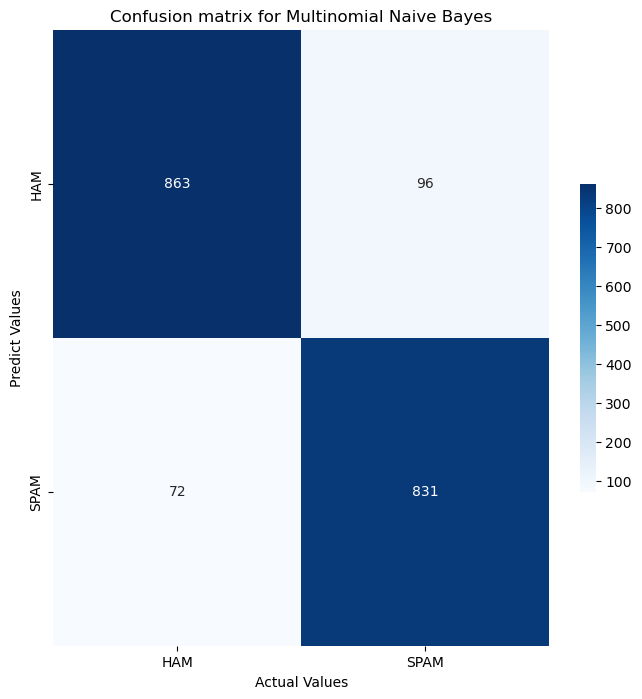

In [93]:
import seaborn as sms
plt.figure(figsize=(8,8))
axis_labels=["HAM","SPAM"]
g=sms.heatmap(data=ce,xticklabels=axis_labels,yticklabels=axis_labels,fmt='g',cbar_kws={"shrink":0.5},cmap="Blues"  ,annot=True)
p=plt.title("Confusion matrix for Multinomial Naive Bayes")
p=plt.xlabel("Actual Values")
p=plt.ylabel("Predict Values")

In [95]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
wt=cross_val_score(dt,x,y,scoring="f1",cv=10)
print(round(wt.mean(),3))
print(round(wt.std(),3))

0.969
0.002


In [97]:
dt.fit(X_train,Y_train)
Y_pred=dt.predict(X_test)


In [99]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       959
           1       0.97      0.96      0.97       903

    accuracy                           0.97      1862
   macro avg       0.97      0.97      0.97      1862
weighted avg       0.97      0.97      0.97      1862



In [102]:
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[934,  25],
       [ 34, 869]], dtype=int64)

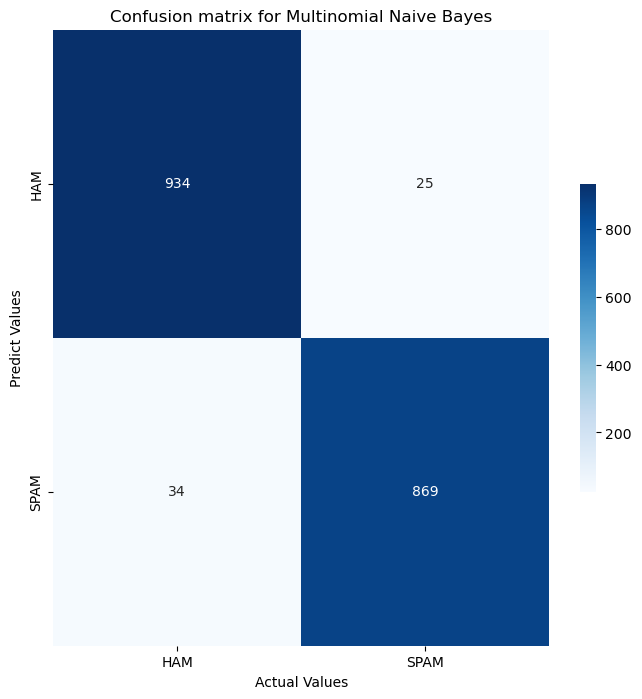

In [103]:
 
plt.figure(figsize=(8,8))
axis_labels=["HAM","SPAM"]
g=sms.heatmap(data=cm,xticklabels=axis_labels,yticklabels=axis_labels,fmt='g',cbar_kws={"shrink":0.5},cmap="Blues"  ,annot=True)
p=plt.title("Confusion matrix for Multinomial Naive Bayes")
p=plt.xlabel("Actual Values")
p=plt.ylabel("Predict Values")

In [109]:
def predict_spam(sms):
    message=re.sub(pattern="[^a-zA-Z]",repl=' ',string=sms) # filtering special characters
    message=message.lower()
    words=message.split() #tokenizer
    filtered_words=[word for word in words if word not in set(stopwords.words('english'))]
    lem_words=[uml.lemmatize(word) for word in filtered_words]
    message=' '.join(lem_words)
    temp=tfidf.fit_transform([message]).toarray()
    return dt.predict(temp)

In [114]:
# prediction 2: lottery text message
sample_message="IMPORTANT: you could be entitled as a ₹ 143 In the compensation of axis.PPI in credict card.please reply to PPi immediately "

if  all(predict_spam(sample_message)):
    print("\n It is a SPAM message")
else:
    print("\n It is a HAM message")


 It is a HAM message


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
